# Airline Social Media Analytics Dashboard

## Project Overview
An end-to-end data analytics project analyzing customer sentiment and engagement across major airlines using Twitter data. The project includes data collection, cleaning, analysis, and interactive visualization of customer feedback and sentiment patterns.

## Technical Stack
- **Python** - Core programming language
- **Pandas** - Data manipulation and analysis
- **Streamlit** - Interactive dashboard creation
- **Plotly** - Data visualization

## Dataset
- Source: Twitter Airline Sentiment Dataset from Kaggle
- Size: 14,487 tweets
- Features: Tweet content, airline, sentiment, timestamp
- Time Period: February 2015
- Airlines Covered: American, Delta, Southwest, United, US Airways, Virgin America

## Methodology
1. **Data Collection & Cleaning**
   - Loaded data using Pandas
   - Handled missing values
   - Created derived features (tweet length, hour of day, day of week)
   - Normalized text data

2. **Analysis Pipeline**
   - Sentiment analysis by airline
   - Temporal pattern analysis
   - Tweet volume analysis
   - Content length analysis

3. **Visualization**
   - Interactive dashboard using Streamlit
   - Real-time filtering capabilities
   - Multiple visualization types (bar charts, line plots, pie charts)

### Data Collection & Setup

This project uses the Twitter US Airline Sentiment dataset from Kaggle. To access the data:

1. Requirements:
   - Kaggle account
   - Kaggle API credentials (kaggle.json file)

2. Getting Your Credentials:
   - Log in to Kaggle
   - Go to Account Settings
   - Scroll to API section
   - Click "Create New API Token"
   - This will download a kaggle.json file

3. Run the setup code below and upload your kaggle.json when prompted

Note: The kaggle.json file contains your private credentials. Never share this file or include it in your shared notebook.

In [ ]:
# Setup Instructions
"""
To run this notebook, you'll need:
1. A Kaggle account and API credentials:
   - Go to kaggle.com and sign up/login
   - Go to 'Account' -> 'Create API Token'
   - Download 'kaggle.json' file

2. Run the following setup code:
"""

# Install required package
!pip install kaggle

# Upload your Kaggle credentials
from google.colab import files
print("Please upload your kaggle.json file when prompted")
files.upload()  # This will prompt you to upload your kaggle.json

# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

"""
Note: Your kaggle.json file contains private credentials and will not be saved
in the notebook. You'll need to upload it each time you run this notebook.
"""

In [2]:
# Download the dataset
!kaggle datasets download crowdflower/twitter-airline-sentiment --path ./data
!unzip ./data/twitter-airline-sentiment.zip -d ./data

Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 53.4MB/s]
Archive:  ./data/twitter-airline-sentiment.zip
  inflating: ./data/Tweets.csv       
  inflating: ./data/database.sqlite  


### Data Exploration & Cleaning

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load & read the dataset
df = pd.read_csv('data/Tweets.csv')
display(df.head())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nBasic Information:")
print(df.info())

Dataset Shape: (14640, 15)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [7]:
# Display basic statistics of numeric columns
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [8]:
# Sample of unique values in categorical columns
print("\nSentiment Categories:\n")
print(df['airline_sentiment'].value_counts())
print("\nAirlines:\n")
print(df['airline'].value_counts())


Sentiment Categories:

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Airlines:

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [9]:
# Check date range
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
print("Date Range:\n")
print("Start Date:", df['tweet_created'].min())
print("End Date:", df['tweet_created'].max())

Date Range:

Start Date: 2015-02-16 23:36:05-08:00
End Date: 2015-02-24 11:53:37-08:00


In [10]:
# Create a function to clean and preprocess the dataset
def clean_dataset(df):
    # Create a copy to avoid modifying original data
    df_clean = df.copy()

    # 1. Handle date/time
    df_clean['tweet_created'] = pd.to_datetime(df_clean['tweet_created'])

    # 2. Clean text data
    df_clean['text_clean'] = df_clean['text'].fillna('')
    df_clean['text_clean'] = df_clean['text_clean'].str.replace(r'http\S+|www.\S+', '', regex=True)  # Remove URLs
    df_clean['text_clean'] = df_clean['text_clean'].str.replace(r'@\w+', '', regex=True)  # Remove @mentions
    df_clean['text_clean'] = df_clean['text_clean'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True)  # Remove special characters
    df_clean['text_clean'] = df_clean['text_clean'].str.lower()  # Convert to lowercase

    # 3. Create derived features
    df_clean['tweet_length'] = df_clean['text_clean'].str.len()
    df_clean['word_count'] = df_clean['text_clean'].str.split().str.len()

    # 4. Handle missing values
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

    # 5. Convert categorical variables
    df_clean['sentiment_label'] = df_clean['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

    # 6. Create time-based features
    df_clean['hour'] = df_clean['tweet_created'].dt.hour
    df_clean['day'] = df_clean['tweet_created'].dt.day
    df_clean['day_of_week'] = df_clean['tweet_created'].dt.day_name()

    return df_clean

In [11]:
# Clean the data
df_clean = clean_dataset(df)

# Show the results
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_clean.shape)
print("\nNew Features Added:", [col for col in df_clean.columns if col not in df.columns])

Original Shape: (14640, 15)
Cleaned Shape: (14640, 22)

New Features Added: ['text_clean', 'tweet_length', 'word_count', 'sentiment_label', 'hour', 'day', 'day_of_week']


In [12]:
# Display sample of cleaned data
print("Sample of Cleaned Data:")
display(df_clean[['text_clean', 'sentiment_label', 'tweet_length', 'word_count', 'hour', 'day', 'day_of_week']].head())

# Display basic statistics of new features
print("\nNew Features Statistics:\n")
print(df_clean[['tweet_length', 'word_count']].describe())

Sample of Cleaned Data:


,text_clean,sentiment_label,tweet_length,word_count,hour,day,day_of_week
0,what said,1,12,2,11,24,Tuesday
1,plus you ve added commercials to the experien...,2,58,9,11,24,Tuesday
2,i didn t today must mean i need to take an...,1,57,12,11,24,Tuesday
3,it s really aggressive to blast obnoxious en...,0,112,17,11,24,Tuesday
4,and it s a really big bad thing about it,0,41,10,11,24,Tuesday



New Features Statistics:

       tweet_length    word_count
count  14640.000000  14640.000000
mean      90.665096     16.469399
std       36.661691      6.999655
min        2.000000      1.000000
25%       62.000000     11.000000
50%      100.000000     18.000000
75%      123.000000     22.000000
max      176.000000     33.000000


### Sentiment Analysis and Airlines Performance

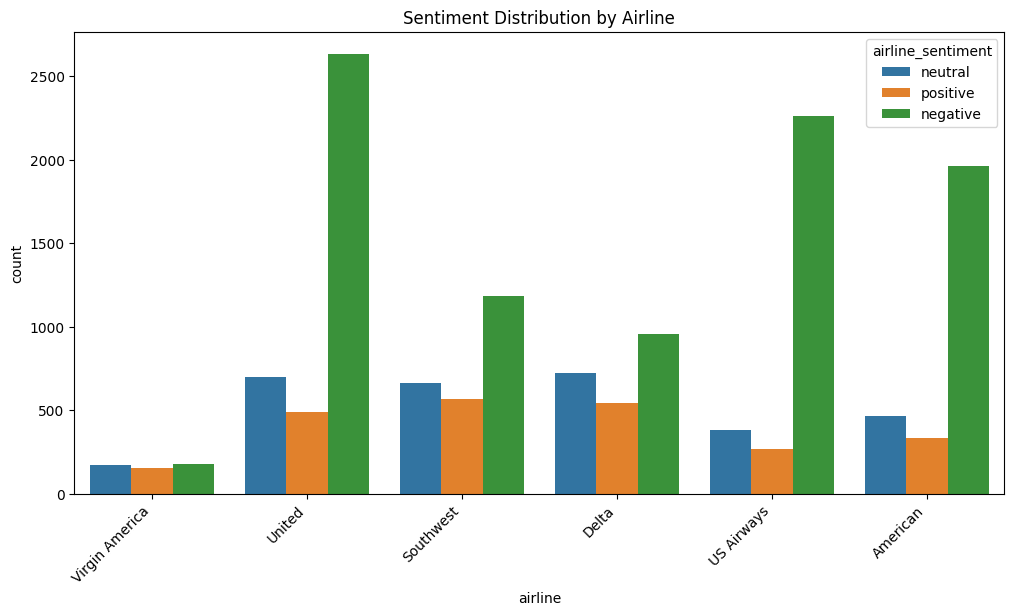

In [13]:
# Overall sentiment distribution by airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='airline', hue='airline_sentiment')
plt.title('Sentiment Distribution by Airline')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Calculate sentiment percentages for each airline
sentiment_by_airline = pd.crosstab(df_clean['airline'], df_clean['airline_sentiment'], normalize='index') * 100
print("Sentiment Percentages by Airline:\n")
print(sentiment_by_airline)

Sentiment Percentages by Airline:

airline_sentiment   negative    neutral   positive
airline                                           
American           71.040232  16.781443  12.178325
Delta              42.979298  32.538254  24.482448
Southwest          49.008264  27.438017  23.553719
US Airways         77.686234  13.079300   9.234466
United             68.890633  18.236525  12.872841
Virgin America     35.912698  33.928571  30.158730


<Figure size 1500x800 with 0 Axes>

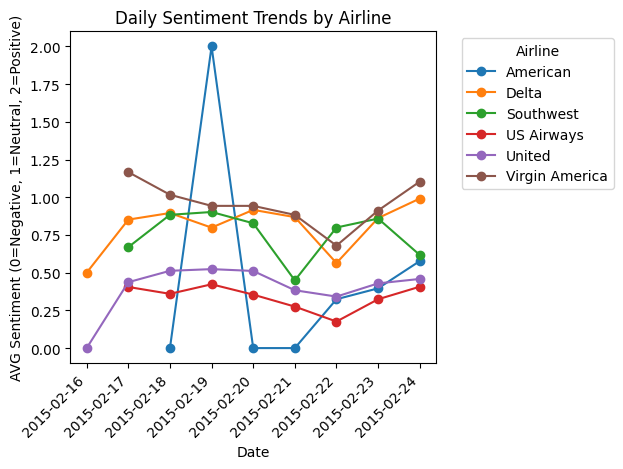

In [15]:
# Time-based analysis
df_clean['date'] = df_clean['tweet_created'].dt.date
daily_sentiment = df_clean.groupby(['date', 'airline'])['sentiment_label'].mean().unstack()

plt.figure(figsize=(15, 8))
daily_sentiment.plot(marker='o')
plt.title('Daily Sentiment Trends by Airline')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('AVG Sentiment (0=Negative, 1=Neutral, 2=Positive)')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### User Activity Patterns

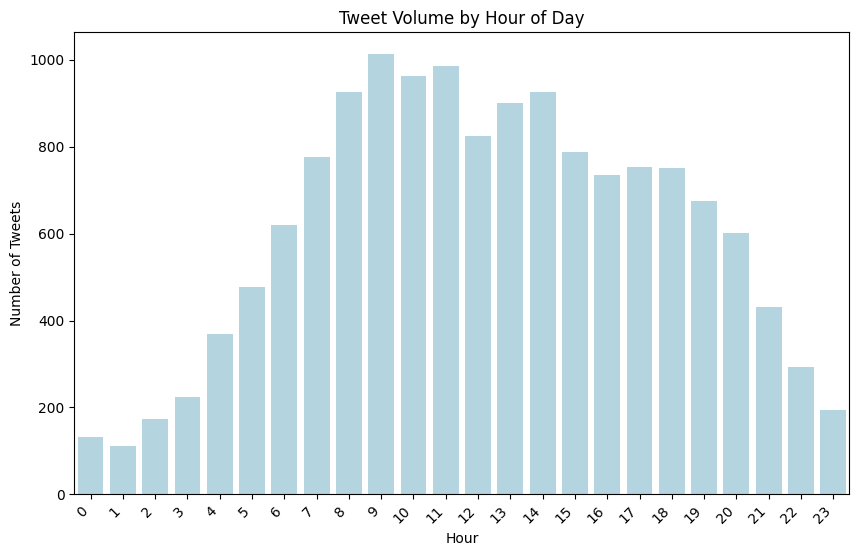

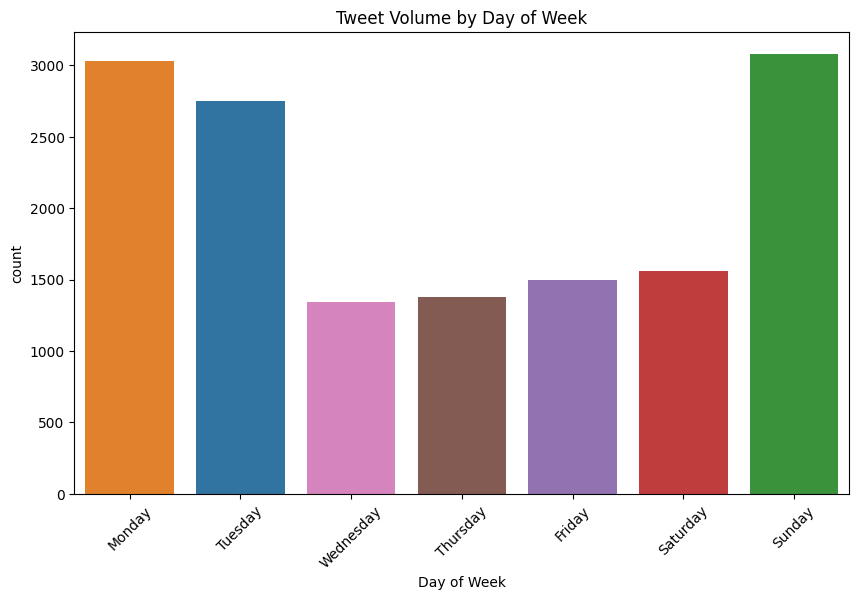

In [16]:
# Hourly activity patterns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='hour', color='lightblue')
plt.title('Tweet Volume by Hour of Day')
plt.xlabel('Hour')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Tweets')
plt.show()
print()

# Day of week patterns
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_clean, x='day_of_week', order=order, hue='day_of_week')
plt.title('Tweet Volume by Day of Week')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

### Text Analysis

In [17]:
# Create a function to extract most common words from a text
from collections import Counter
import re

def get_common_words(text_series, n=10):
    words = ' '.join(text_series).split()
    word_counts = Counter(words)
    return pd.DataFrame(word_counts.most_common(n), columns=['word', 'count'])

# Get common words by sentiment
negative_words = get_common_words(df_clean[df_clean['airline_sentiment'] == 'negative']['text_clean'])
positive_words = get_common_words(df_clean[df_clean['airline_sentiment'] == 'positive']['text_clean'])

print("Most Common Words in Negative Tweets:\n")
print(negative_words)
print("\nMost Common Words in Positive Tweets:\n")
print(positive_words)

Most Common Words in Negative Tweets:

     word  count
0      to   6049
1       i   4565
2     the   4116
3       a   3225
4  flight   2959
5     and   2825
6      on   2792
7     you   2722
8     for   2716
9      my   2406

Most Common Words in Positive Tweets:

     word  count
0     the    972
1      to    938
2     you    913
3       i    754
4     for    670
5  thanks    611
6       a    544
7   thank    454
8     and    451
9  flight    382


### Response Time Analysis

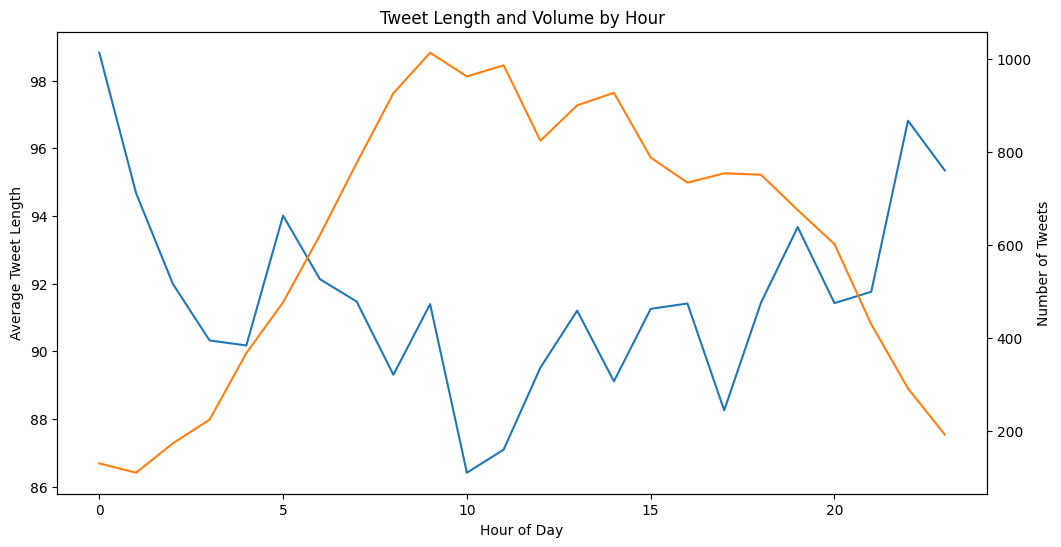

In [18]:
# Calculate average tweet length and response counts by hour
hourly_metrics = df_clean.groupby('hour').agg({
    'tweet_length': 'mean',
    'airline_sentiment': 'count'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Tweet Length')
ax1.plot(hourly_metrics['hour'], hourly_metrics['tweet_length'], color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Tweets')
ax2.plot(hourly_metrics['hour'], hourly_metrics['airline_sentiment'], color='tab:orange')

plt.title('Tweet Length and Volume by Hour')
plt.show()

In [19]:
# Save cleaned data
df_clean.to_csv('data/cleaned_tweets.csv', index=False)

### Interactive Dashboard with Streamlit

In [20]:
# Install Streamlit
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [21]:
%%writefile dashboard.py
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go

# Set page configuration
st.set_page_config(page_title="Airline Social Media Analysis", layout="wide")

# Load data
df = pd.read_csv('data/cleaned_tweets.csv')
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Title and description
st.title('✈️ Airline Social Media Analytics Dashboard')
st.markdown('Analysis of customer sentiment and engagement across major airlines')

# Sidebar filters
st.sidebar.header('Filters')
airline_filter = st.sidebar.multiselect(
    'Select Airlines',
    options=df['airline'].unique(),
    default=df['airline'].unique()
)

# Filter data based on selection
filtered_df = df[df['airline'].isin(airline_filter)]

# Key Metrics Row
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Total Tweets", len(filtered_df))
with col2:
    positive_pct = (filtered_df['airline_sentiment'] == 'positive').mean() * 100
    st.metric("Positive Sentiment", f"{positive_pct:.1f}%")
with col3:
    peak_hour = filtered_df.groupby('hour')['text'].count().idxmax()
    st.metric("Peak Activity Hour", f"{peak_hour}:00")
with col4:
    most_active = filtered_df['airline'].mode()[0]
    st.metric("Most Active Airline", most_active)

# First row of charts
st.subheader('Sentiment Analysis')
col1, col2 = st.columns(2)

with col1:
    # Sentiment Distribution by Airline
    sentiment_dist = px.bar(
        filtered_df.groupby('airline')['airline_sentiment'].value_counts(normalize=True).unstack() * 100,
        title='Sentiment Distribution by Airline',
        color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1']
    )
    sentiment_dist.update_layout(height=400)
    st.plotly_chart(sentiment_dist, use_container_width=True)

with col2:
    # Overall Sentiment Distribution
    pie_chart = px.pie(
        filtered_df,
        names='airline_sentiment',
        title='Overall Sentiment Distribution',
        color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1']
    )
    pie_chart.update_layout(height=400)
    st.plotly_chart(pie_chart, use_container_width=True)

# Second row of charts
st.subheader('Temporal Analysis')
col1, col2 = st.columns(2)

with col1:
    # Hourly Activity Pattern
    hourly_data = filtered_df.groupby('hour')['text'].count().reset_index()
    hourly_fig = px.line(
        hourly_data,
        x='hour',
        y='text',
        title='Tweet Volume by Hour',
        labels={'text': 'Number of Tweets', 'hour': 'Hour of Day'}
    )
    hourly_fig.update_layout(height=400)
    st.plotly_chart(hourly_fig, use_container_width=True)

with col2:
    # Defining the correct order of days
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Weekly Pattern
    weekly_data = filtered_df.groupby('day_of_week')['text'].count().reset_index()

    # Convert day_of_week to categorical with specific order
    weekly_data['day_of_week'] = pd.Categorical(weekly_data['day_of_week'],
                                          categories=day_order,
                                          ordered=True)
    # Sort by the categorical order
    weekly_data = weekly_data.sort_values('day_of_week')

    weekly_fig = px.bar(
        weekly_data,
        x='day_of_week',
        y='text',
        title='Weekly Tweet Pattern',
        labels={'text': 'Number of Tweets', 'day_of_week': 'Day of Week'},
        category_orders={'day_of_week': day_order}  # Specify the order in the plot
    )
    weekly_fig.update_layout(height=400)
    st.plotly_chart(weekly_fig, use_container_width=True)

# Tweet Length Analysis
st.subheader('Content Analysis')
col1, col2 = st.columns(2)

with col1:
    # Tweet Length Distribution
    length_hist = px.histogram(
        filtered_df,
        x='tweet_length',
        title='Tweet Length Distribution',
        nbins=50
    )
    length_hist.update_layout(height=400)
    st.plotly_chart(length_hist, use_container_width=True)

with col2:
    # Average Tweet Length by Sentiment
    avg_length = filtered_df.groupby('airline_sentiment')['tweet_length'].mean().reset_index()
    length_bar = px.bar(
        avg_length,
        x='airline_sentiment',
        y='tweet_length',
        title='Average Tweet Length by Sentiment',
        labels={'tweet_length': 'Average Length', 'airline_sentiment': 'Sentiment'}
    )
    length_bar.update_layout(height=400)
    st.plotly_chart(length_bar, use_container_width=True)

# Footer
st.markdown('---')
st.markdown('Dashboard created using Python, Pandas, and Streamlit')

Writing dashboard.py


In [22]:
# Install additional packages and libraries
!pip install pyngrok
!pip install streamlit-option-menu

from pyngrok import ngrok
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 8.4 MB/s eta 0:00:00


### Setup Instructions

1. Get your ngrok authentication token:
   - Sign up at ngrok.com (free)
   - Go to https://dashboard.ngrok.com/auth/your-authtoken
   - Copy your auth token

2. Replace `YOUR_NGROK_AUTH_TOKEN` in the code below with your actual token

3. Run the cell to start the dashboard

Note: Never share your actual auth token publicly!

In [ ]:
# Kill any existing Streamlit processes
!pkill -f streamlit || true

# Authentication Setup
AUTH_TOKEN = "YOUR_NGROK_AUTH_TOKEN"  # Replace with your ngrok auth token
!ngrok authtoken $AUTH_TOKEN

# Configure and start ngrok
ngrok.kill()
public_url = ngrok.connect(addr="8501", proto="http")
print(f"\nNgrok URL: {public_url.public_url}\n")

# Start Streamlit
print("Starting Streamlit...")
!nohup streamlit run dashboard.py --server.port 8501 &

## Key Findings
1. **Sentiment Analysis**
   - Overall negative sentiment dominance (approximately 62%)
   - Virgin America had the highest positive sentiment ratio
   - US Airways had the highest negative sentiment ratio

2. **Temporal Patterns**
   - Peak activity observed at 9 AM
   - Higher engagement during Sundays, Mondays, and Tuesdays

3. **Engagement Metrics**
   - Average tweet length varied by sentiment, with negative tweets being the longest (average of 101 characters)
   - This suggests customers tend to write more detailed feedback when expressing dissatisfaction

## Visualizations

The dashboard includes:

- Sentiment distribution by airline
- Hourly tweet volume patterns
- Weekly engagement trends
- Overall sentiment breakdown
- Tweet length analysis

## Future Improvements

1. Real-time data collection using Twitter API
2. Advanced sentiment analysis using machine learning
3. Competitor analysis features
4. Geographic distribution analysis
5. Topic modeling for customer issues